# Analysis 3

# Part1: Analyzing the difference in the quality of education between US and UK and plotting a seaborn plot


# Part 2: Analyzing the rankings of top 81 universities from 200 to 2015

In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.path as path
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from subprocess import check_output


In [3]:
#cwur file is read
df = pd.read_csv('data/cwurData.csv')
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


367


C:\Users\smrut\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


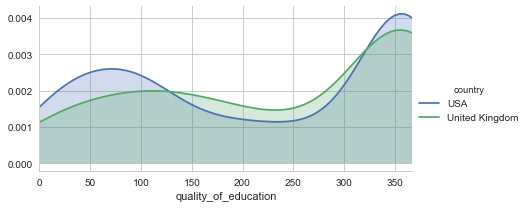

In [4]:
#defining a fucniton that returns the quality of education of universities in USA.
def return_quality(c):
    return df[df.country == c].quality_of_education.tolist()

    us_quality = return_quality('USA')
    
df_c = df.loc[(df.country == "USA") | (df.country == "United Kingdom"), ['world_rank', 'country', 'quality_of_education']]
print(df_c['quality_of_education'].max())

facet = sns.FacetGrid(df_c, hue="country",aspect=2)
facet.map(sns.kdeplot,'quality_of_education',shade= True)
facet.set(xlim=(0, df_c['quality_of_education'].max()))
facet.add_legend()

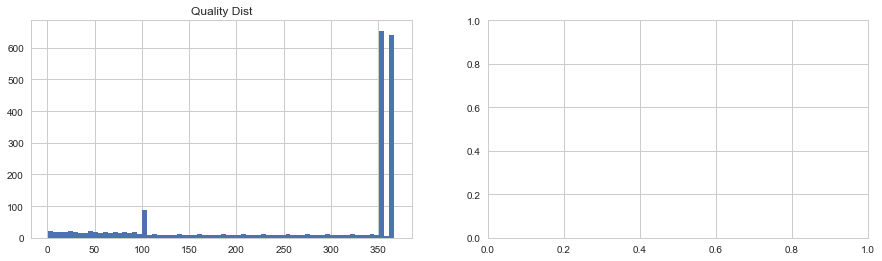

In [5]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Quality Dist')
df['quality_of_education'].dropna().astype(int).hist(bins=70, ax=axis1)

# Analysing the difference in ranking from 2005 to 2015 for the top 81 universities

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.path as path
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [7]:
shanghai = pd.read_csv('data/shanghaiData.csv')
print(shanghai.head())

# A bit of feature cleaning
shanghai.world_rank = [int(x.split('-')[0]) if type(x) == str else x for x in shanghai.world_rank]

  world_rank                              university_name national_rank  \
0          1                           Harvard University             1   
1          2                      University of Cambridge             1   
2          3                          Stanford University             2   
3          4           University of California, Berkeley             3   
4          5  Massachusetts Institute of Technology (MIT)             4   

   total_score  alumni  award   hici     ns    pub   pcp  year  
0        100.0   100.0  100.0  100.0  100.0  100.0  72.4  2005  
1         73.6    99.8   93.4   53.3   56.6   70.9  66.9  2005  
2         73.4    41.1   72.2   88.5   70.9   72.3  65.0  2005  
3         72.8    71.8   76.0   69.4   73.9   72.2  52.7  2005  
4         70.1    74.0   80.6   66.7   65.8   64.3  53.0  2005  


In [8]:
#Getting a list of the top 81 universities of shangai Data of the year 2015.
TopN_last = shanghai[(shanghai.year == 2015) & (shanghai.world_rank.astype(int) < 81)]

TopNidxs = [True if name in TopN_last.university_name.unique() else False for name in shanghai.university_name]

TopN_all_yrs = shanghai[TopNidxs]

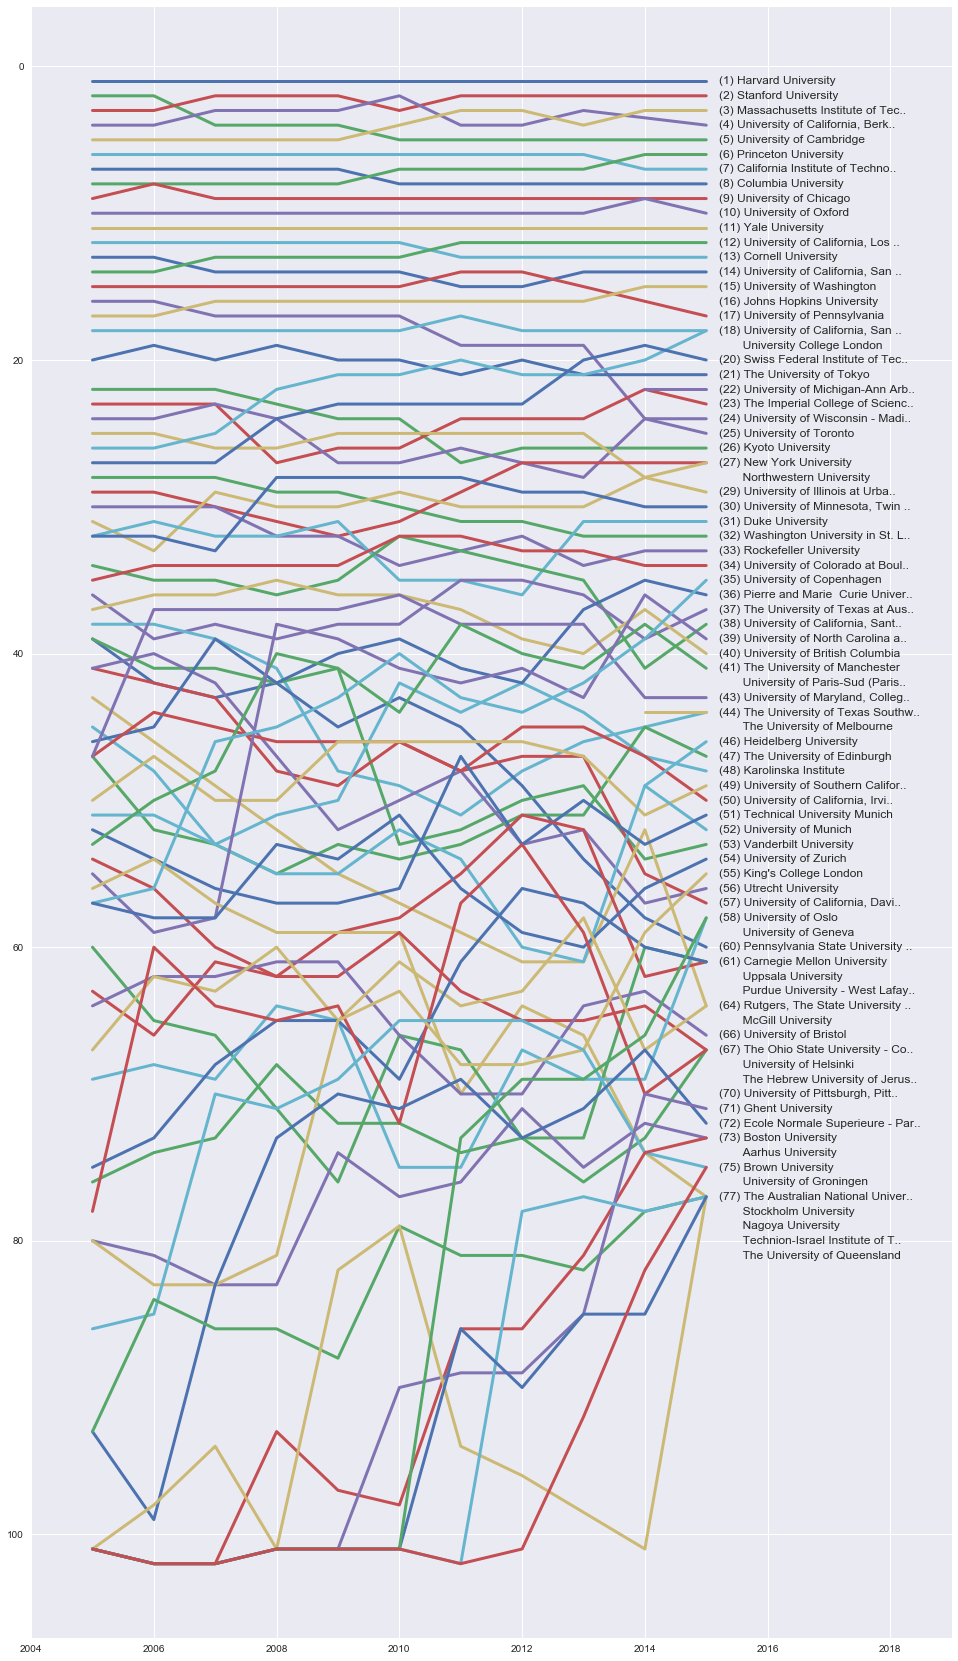

In [10]:
# Setting the plotting style 
sns.set_style('darkgrid')

label_occupancy = np.zeros(len(TopN_last))

for uni in TopN_all_yrs.university_name.unique():
    uni_df = TopN_all_yrs[TopN_all_yrs.university_name == uni]
    T = uni_df.year.unique()
    rank = uni_df.world_rank.values
    
    
    var = -1
    
    while not(label_occupancy[rank[-1] + var] == 0):
        var += 1    
    
    label_occupancy[rank[-1] + var] = 1
    lab_y = rank[-1] + var + 1
    
    if var == -1:
         bullet = "("+ str(rank[-1]) + ") "
    else:
         bullet = " "*(5 + len(str(rank[-1])))           
    
    max_len = 30

    uni_name = (uni[:max_len] + '..') if len(uni) > max_len else uni
    
    plt.plot(T, rank, linewidth = 3)
    plt.text(T[-1]+0.2,
             lab_y,
             bullet + uni_name,
             verticalalignment='center')

    
plt.gca().invert_yaxis()
plt.xlim([2004, 2019])
fig = plt.gcf()
fig.set_size_inches(16.5, 30)
plt.show()
